In [9]:
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import h5py
import warnings
warnings.filterwarnings('ignore')

In [10]:
num_classes=3
input_shape=(128,128,3)

In [11]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='tanh', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics=['accuracy'])
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'training_set',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical' )

test_set = test_datagen.flow_from_directory(
        'val_set',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')

classifier = model.fit_generator(
        training_set,
        steps_per_epoch=10,
        epochs=30,
        validation_data=test_set,
        validation_steps=100)


Found 3432 images belonging to 3 classes.
Found 1186 images belonging to 3 classes.
Epoch 1/30
10/10 [==============================] - 143s 14s/step - loss: 0.7991 - acc: 0.6203 - val_loss: 0.5737 - val_acc: 0.7715
Epoch 2/30
10/10 [==============================] - 154s 15s/step - loss: 0.5316 - acc: 0.7781 - val_loss: 0.3634 - val_acc: 0.8693
Epoch 3/30
10/10 [==============================] - 142s 14s/step - loss: 0.4020 - acc: 0.8469 - val_loss: 0.3286 - val_acc: 0.9067
Epoch 4/30
10/10 [==============================] - 134s 13s/step - loss: 0.3397 - acc: 0.8766 - val_loss: 0.2936 - val_acc: 0.9023
Epoch 5/30
10/10 [==============================] - 134s 13s/step - loss: 0.3735 - acc: 0.8656 - val_loss: 0.2781 - val_acc: 0.9078
Epoch 6/30
10/10 [==============================] - 135s 13s/step - loss: 0.3326 - acc: 0.8924 - val_loss: 0.2782 - val_acc: 0.9061
Epoch 7/30
10/10 [==============================] - 134s 13s/step - loss: 0.3320 - acc: 0.8672 - val_loss: 0.2652 - val_acc:

In [13]:
model.save_weights('model.h5')

In [14]:
print(classifier.history.keys())

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


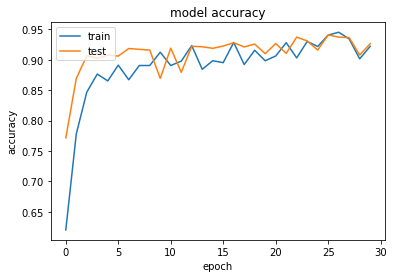

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(classifier.history['acc'])
plt.plot(classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

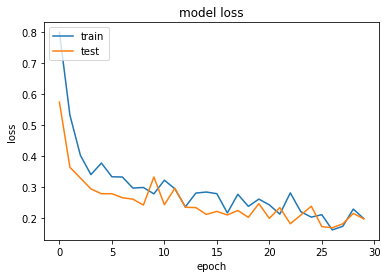

In [16]:
# summarize history for loss
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()